<a href="https://colab.research.google.com/github/meghanjukl-meg/ICTK_Assignment/blob/main/Linear_Regression_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 📓 Linear Regression from Scratch

### 🎯 Objective
- Implement a linear regression model using gradient descent.
- Derive the gradient updates, write a scikit-learn-like class, and evaluate using synthetic data.
- Compare the result of the same with library code output
- Use R2-Score and Mean Absolute Percentage error as Performance metric on test data

## 📊 Generate Synthetic Data

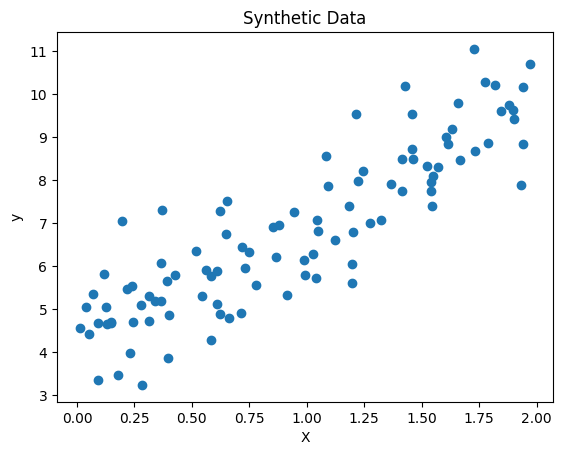

In [1]:

import numpy as np
import matplotlib.pyplot as plt

# Set seed for reproducibility
np.random.seed(42)

# Generate synthetic data
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

# Plot
plt.scatter(X, y)
plt.xlabel("X")
plt.ylabel("y")
plt.title("Synthetic Data")
plt.show()


## Do Train-Test Split (75%-25%)

In [2]:
# Write your code here
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)
print(f"Total samples: {len(X)}")
print(f"Training set:{len(X_train)} samples")
print(f"Testing set:{len(X_test)} samples")

Total samples: 100
Training set:75 samples
Testing set:25 samples


## Do the Linear Regression with Scikit-Learn Library

In [3]:
# Write your code here
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_percentage_error,r2_score
lr_model = LinearRegression()
lr_model.fit(X_train,y_train)

y_pred_sk = lr_model.predict(X_test)

mape = mean_absolute_percentage_error(y_test, y_pred_sk)
r2 = r2_score(y_test,y_pred_sk)

print(f"MAPE: {mape:.4f}")
print(f"R2-Score: {r2:.4f}")

MAPE: 0.0848
R2-Score: 0.8311


## Do Ridge and Lasso Regression and Compare the evaluation metrics in a table

In [4]:
# Write your code here
from sklearn.linear_model import Ridge, Lasso
import pandas as pd

ridge_model = Ridge(alpha=1.0)
lasso_model = Lasso(alpha=1.0)

#results to Dictionary
results = []

for name, model in [("Ridge", ridge_model), ("Lasso", lasso_model)]:

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    r2 = r2_score(y_test, y_pred)
    mape = mean_absolute_percentage_error(y_test, y_pred)

    results.append({"Model": name, "R2-Score": round(r2, 4), "MAPE": round(mape, 4)})

# as a table
comparison_df = pd.DataFrame(results)
print(comparison_df)


   Model  R2-Score    MAPE
0  Ridge    0.8260  0.0824
1  Lasso   -0.0853  0.2424


## Custom Implementation

## 🧮 Derive the Gradient Updates
Use the chain rule to derive the gradients of the loss function (Mean Square Error):

$$ \text{Loss} = \frac{1}{N} \sum_{i=1}^{N} (y_i - (mx_i + c))^2 $$

Derive:
- ∂Loss/∂m
- ∂Loss/∂c

Write the derivation here/add screenshot of your derivation here:

The MSE loss is defined as:$$ \text{Loss} = \frac{1}{N} \sum_{i=1}^{N} (y_i - (mx_i + c))^2 $$
Let the error term for a single observation be $$ e_{i}=y_{i}-(mx_{i}+c)$$.
 The loss becomes: $$ \text{Loss}=\frac{1}{N}\sum _{i=1}^{N}e_{i}^{2}\ $$


1. **Deriving** $$ \frac{\partial \text{Loss}}{\partial m}\ $$

 We use the chain rule: $$ \frac{\partial \text{Loss}}{\partial m}=\frac{\partial \text{Loss}}{\partial e_{i}}\cdot \frac{\partial e_{i}}{\partial m}\ $$

Outer derivative: $$ \frac{\partial }{\partial e_{i}}(e_{i}^{2})=2e_{i}\ $$

Inner derivative: $$ \frac{\partial }{\partial m}(y_{i}-mx_{i}-c)=-x_{i}\ $$

Combine:$$ \frac{\partial \text{Loss}}{\partial m}=\frac{1}{N}\sum _{i=1}^{N}2(y_{i}-(mx_{i}+c))\cdot (-x_{i})\ $$
$$ \frac{\mathbf{\partial }\text{Loss}}{\mathbf{\partial m}}\mathbf{=-}\frac{\mathbf{2}}{\mathbf{N}}\sum _{\mathbf{i=1}}^{\mathbf{N}}\mathbf{x}_{\mathbf{i}}\mathbf{(y}_{\mathbf{i}}\mathbf{-}\mathbf{\hat{y}}_i\mathbf{)}\ $$

2. **Deriving** $$ \frac{\partial \text{Loss}}{\partial c}\ $$
  Similarly, we apply the chain rule for the intercept: $$ \frac{\partial \text{Loss}}{\partial c}=\frac{\partial \text{Loss}}{\partial e_{i}}\cdot \frac{\partial e_{i}}{\partial c}\ $$
Outer derivative: $$ \frac{\partial }{\partial e_{i}}(e_{i}^{2})=2e_{i}\ $$
Inner derivative: $$ \frac{\partial }{\partial c}(y_{i}-mx_{i}-c)=-1\ $$
Combine:$$ \frac{\partial \text{Loss}}{\partial c}=\frac{1}{N}\sum _{i=1}^{N}2(y_{i}-(mx_{i}+c))\cdot (-1)\ $$
$$ \frac{\mathbf{\partial }\text{Loss}}{\mathbf{\partial c}}\mathbf{=-}\frac{\mathbf{2}}{\mathbf{N}}\sum _{\mathbf{i=1}}^{\mathbf{N}}\mathbf{(y}_{\mathbf{i}}\mathbf{-} \mathbf{\hat{y}}_i\mathbf{)}\ $$

where $$ \mathbf{\hat{y}}_i\mathbf{=mx}_{\mathbf{i}}\mathbf{+c}\ $$

## 🧠 Custom Linear Regression Class

In [19]:

class MyLinearRegression:
    def __init__(self):

       self.m = None
       self.c = None
       self.loss = []

    def fit(self, X, y, lr=0.01, n_iters=1000):

        # X -> 2D array and y -> 1D array for consistency
        n_samples, n_features = X.shape

        #y -> 1D to prevent shape issues
        y = y.ravel()

        self.m = np.zeros(n_features)
        self.c = 0
        self.loss = []

        # Gradient Descent loop
        for i in range(n_iters):
            y_pred = np.dot(X, self.m) + self.c

            #MSE(Loss)
            loss = np.mean((y - y_pred)**2)
            self.loss.append(loss)

            error = y - y_pred

            # derivedgradient calculaton:
            # dm = -2/N * sum(x * (y - y_pred))
            # dc = -2/N * sum(y - y_pred)
            dm = (-2 / n_samples) * np.dot(X.T, (y - y_pred))
            dc = (-2 / n_samples) * np.sum(y - y_pred)

            # Update parameters
            self.m -= lr * dm
            self.c -= lr * dc

    def predict(self, X):
        # y = mx + c
        return np.dot(X, self.m) + self.c

    def fit_transform(self, X, y, lr=0.01, n_iters=1000):
        self.fit(X, y, lr, n_iters)
        return self.predict(X)


## 🔁 Train the Model and Visualize the Fit

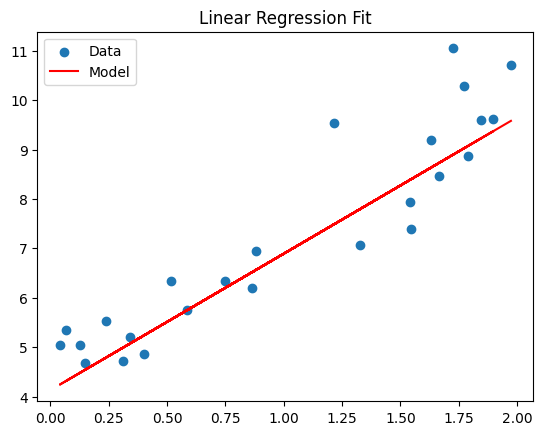


 Learned coefficients m = [2.76028721],c = 4.131338540026423


In [20]:

model = MyLinearRegression()
model.fit(X_train, y_train, lr=0.1, n_iters=100)

y_pred_custom = model.predict(X_test)

plt.scatter(X_test, y_test, label="Data")
plt.plot(X_test, y_pred_custom, color="red", label="Model")
plt.legend()
plt.title("Linear Regression Fit")
plt.show()

print(f"\n Learned coefficients m = {model.m},c = {model.c}" )


## 📉 Plot the Loss Curve

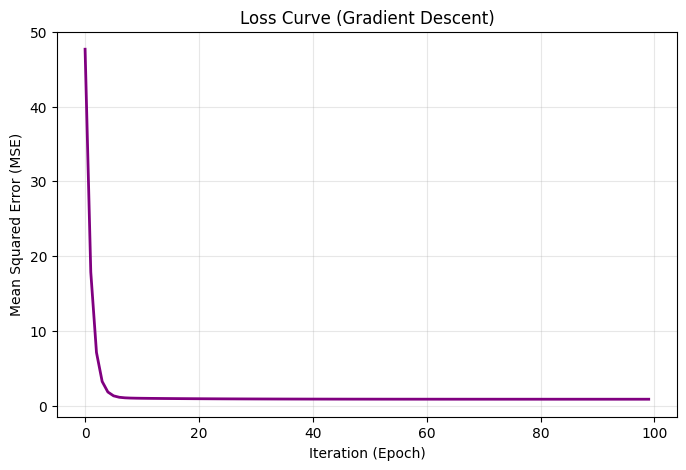

In [13]:
# Write your code here
plt.figure(figsize=(8, 5))
plt.plot(model.loss, color="purple", linewidth=2)
plt.title("Loss Curve (Gradient Descent)")
plt.xlabel("Iteration (Epoch)")
plt.ylabel("Mean Squared Error (MSE)")
plt.grid(True, alpha=0.3)
plt.show()

## 🌟 Bonus Task: Stochastic Gradient Descent
Implement a class `MyLinearRegressionSGD` that uses one training sample per iteration to update weights.

In [21]:
# Write your code here

class MyLinearRegressionSGD:
    def __init__(self):
        self.m = None
        self.c = None
        self.loss = []

    def fit(self, X, y, lr=0.01, epochs=100):
        X = np.array(X)
        n_samples, n_features = X.shape
        y = y.ravel()

        self.m = np.zeros(n_features)
        self.c = 0
        self.loss = []

        for epoch in range(epochs):
            # Shuffle data at the start of each epoch for true SGD
            indices = np.random.permutation(n_samples)
            X_shuffled = X[indices]
            y_shuffled = y[indices]

            epoch_loss = 0

            for i in range(n_samples):
                # taking one sample
                xi = X_shuffled[i]
                yi = y_shuffled[i]

                #Single sample prediction
                yi_pred = np.dot(xi, self.m) + self.c
                error =  yi - yi_pred

                # Gradients
                dm = -2 * xi * error
                dc = -2 * error

                self.m -= lr * dm
                self.c -= lr * dc

                epoch_loss += error**2

            # Record average loss for this epoch
            self.loss.append(epoch_loss / n_samples)

    def predict(self, X):
        return np.dot(X, self.m) + self.c


Final SGD Loss: 0.8837


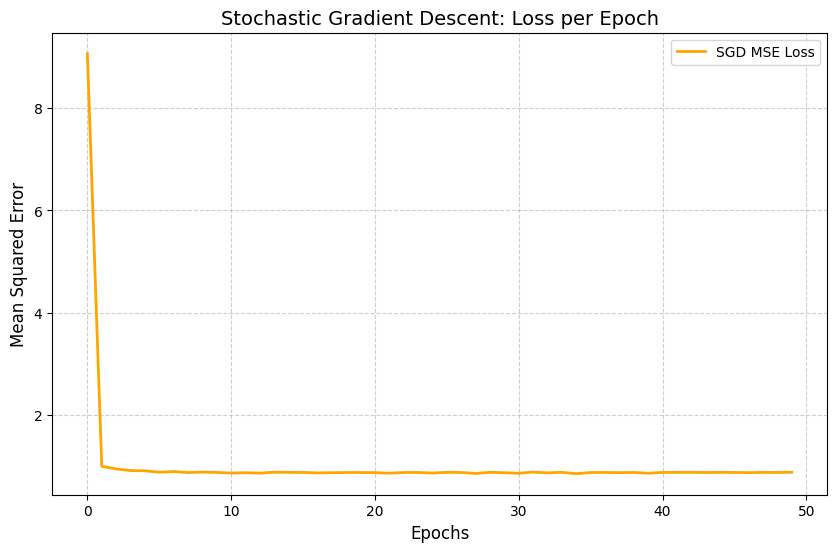

In [22]:
# Plot loss curve while using Stochastic Gradient Descent

import matplotlib.pyplot as plt

sgd_model = MyLinearRegressionSGD()
sgd_model.fit(X_train, y_train, lr=0.01, epochs=50)

plt.figure(figsize=(10, 6))
plt.plot(sgd_model.loss, color="orange", linewidth=2, label="SGD MSE Loss")

plt.title("Stochastic Gradient Descent: Loss per Epoch", fontsize=14)
plt.xlabel("Epochs", fontsize=12)
plt.ylabel("Mean Squared Error", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()

#the final loss
print(f"Final SGD Loss: {sgd_model.loss[-1]:.4f}")
plt.show()


## Visualize the prediction result of Library version and Custom regression code created

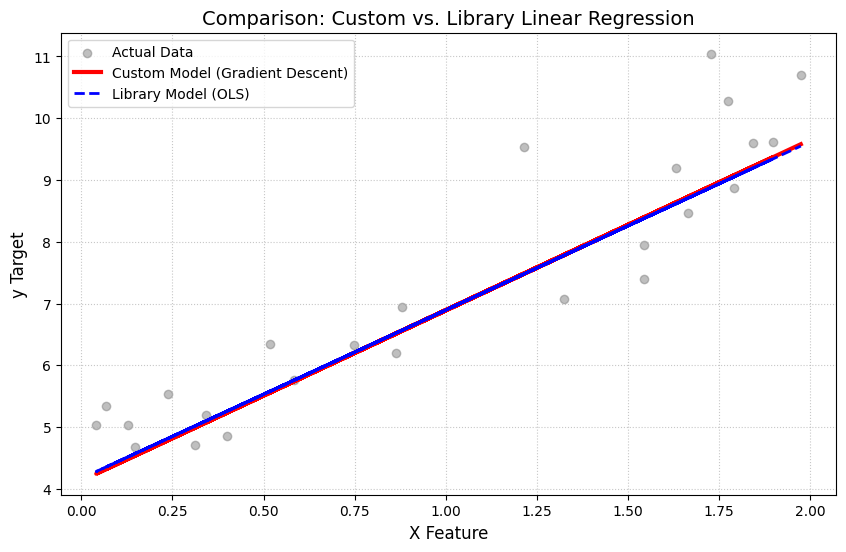

Custom Model:   m = 2.760287211333097, c = 4.131338540026423
Library Model:  m = [2.72587297], c = [4.16878815]


In [23]:
# Write your code here
plt.figure(figsize=(10, 6))
#Actual
plt.scatter(X_test, y_test, color='gray', alpha=0.5, label='Actual Data')

# Custom (Dashed)
plt.plot(X_test, y_pred_custom, color='red', linewidth=3, label='Custom Model (Gradient Descent)')

# Scikit-Learn line (Solid)
plt.plot(X_test, y_pred_sk, color='blue', linewidth=2, linestyle='--', label='Library Model (OLS)')

plt.title("Comparison: Custom vs. Library Linear Regression", fontsize=14)
plt.xlabel("X Feature", fontsize=12)
plt.ylabel("y Target", fontsize=12)
plt.legend()
plt.grid(True, linestyle=':', alpha=0.7)
plt.show()

#Coefficient Comparison
print(f"Custom Model:   m = {model.m[0]}, c = {model.c}")
print(f"Library Model:  m = {lr_model.coef_[0]}, c = {lr_model.intercept_}")


## ✅ Checklist
- [ ] Did linear regression using scikit-learn API
- [ ] Did Ridge and Lasso regression and compiled the result (R2 and MAPE) as a table
- [ ] Derived gradients using chain rule
- [ ] Implemented custom Linear Regression class
- [ ] Trained using gradient descent
- [ ] Visualized predictions and loss
- [ ] Implemented stochastic gradient descent (bonus)
- [ ] Visualized predictions and loss for stochastic gradient descent (bonus)
- [ ] Visualize the prediction result of Library version and custom version